In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import datetime

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [57]:
Customers = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/Case Study 1 - Retail Case Study/Customer.csv')
Customers

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [58]:
Product_category = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/Case Study 1 - Retail Case Study/prod_cat_info.csv')
Product_category

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [59]:
Transactions = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/Case Study 1 - Retail Case Study/Transactions.csv')
Transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [60]:
Customer_Transactions = pd.merge(left = Customers,right = Transactions, left_on = 'customer_Id', right_on = 'cust_id', how = 'inner', indicator = True)
Customer_dataset = pd.merge(left = Customer_Transactions, right = Product_category, left_on = 'prod_cat_code', right_on = 'prod_cat_code', how = 'inner')
Customer_dataset

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women


## 2. Prepare a summary report for the merged data set.
###   a. Get the column names and their corresponding data types

In [61]:
Customer_dataset.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

### b. Top/Bottom 10 observations

In [62]:
Customer_dataset.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [63]:
Customer_dataset.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [64]:
Customer_dataset.describe().loc[['min','25%','50%','75%','max'],:]

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
min,266783.0,1.0,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
25%,268956.0,3.0,2.492150e+10,268956.0,4.0,3.0,1.0,313.0,98.280,762.450,4.0
50%,270982.0,5.0,5.011083e+10,270982.0,7.0,5.0,3.0,713.0,199.920,1761.370,7.0
75%,273120.0,8.0,7.528121e+10,273120.0,10.0,5.0,4.0,1109.0,366.975,3585.725,10.0
max,275265.0,10.0,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,12.0


In [65]:
Data_min = Customer_dataset['total_amt'].min()
Data_max = Customer_dataset['total_amt'].max()
Data_q1  = np.percentile(Customer_dataset.total_amt,25)
median  = np.percentile(Customer_dataset.total_amt,50)
Data_q3  = np.percentile(Customer_dataset.total_amt,75)
print('Min =',Data_min)
print('Max =',Data_max)
print('Median =',median)
print('Q1 =',Data_q1)
print('Q3 =',Data_q3)

Min = -8270.925
Max = 8287.5
Median = 1761.37
Q1 = 762.45
Q3 = 3585.725


### d. Frequency tables for all the categorical variables

In [66]:
freq_table = pd.crosstab(index = Customer_dataset.Gender, columns = Customer_dataset.Store_type)
freq_table

Store_type,Flagship store,MBR,TeleShop,e-Shop
Gender,,,,
F,9767,9687,9159,19589
M,10047,10278,10142,20584


In [67]:
freq_table = pd.crosstab(index = Customer_dataset.Gender, columns = Customer_dataset.prod_subcat)
freq_table

prod_subcat,Academic,Audio and video,Bath,Cameras,Children,Comics,Computers,DIY,Fiction,Furnishing,Kids,Kitchen,Mens,Mobiles,Non-Fiction,Personal Appliances,Tools,Women
Gender,,,,,,,,,,,,,,,,,,
F,2949,2328,1994,2328,2949,2949,2328,2949,2949,1994,2968,1994,3962,2328,2949,2328,1994,3962
M,3116,2570,2134,2570,3116,3116,2570,3116,3116,2134,2987,2134,3991,2570,3116,2570,2134,3991


In [68]:
freq_table = pd.crosstab(index = Customer_dataset.Gender, columns = Customer_dataset.prod_cat)
freq_table

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,1988,17694,4317,11640,4587,7976
M,2008,18696,4554,12850,4407,8536


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

### Continuous variables:-

### 1) Tax

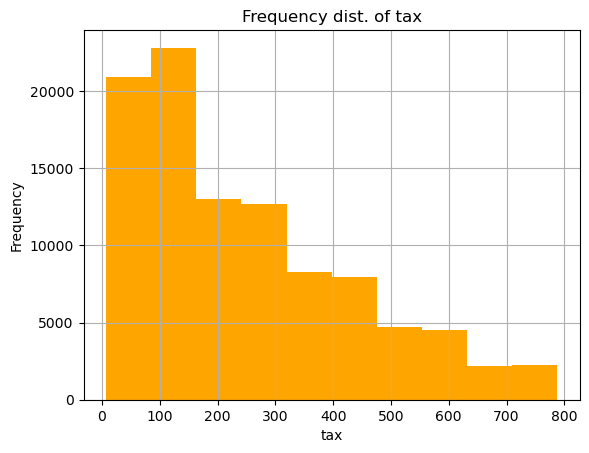

In [69]:
plt.grid()
Tax = Customer_dataset['Tax']
plt.hist(Tax,color=['orange'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.title('Frequency dist. of tax')
plt.show()

### 2) Total Amount

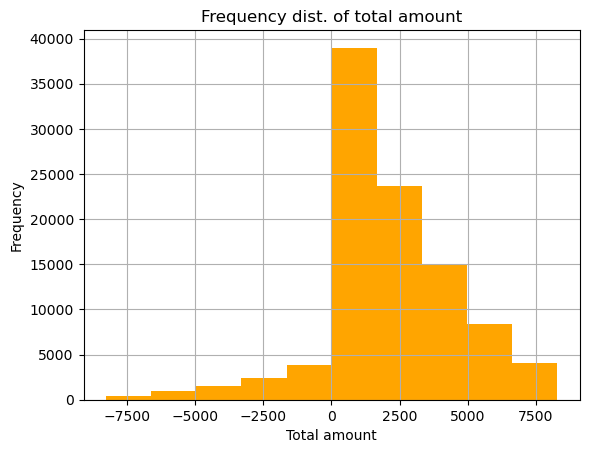

In [70]:
Total_Amount = Customer_dataset['total_amt']
plt.hist(Total_Amount,color = 'orange')
plt.grid()
plt.xlabel('Total amount')
plt.ylabel('Frequency')
plt.title('Frequency dist. of total amount')
plt.show()

### 3) Rate

<Axes: ylabel='Frequency'>

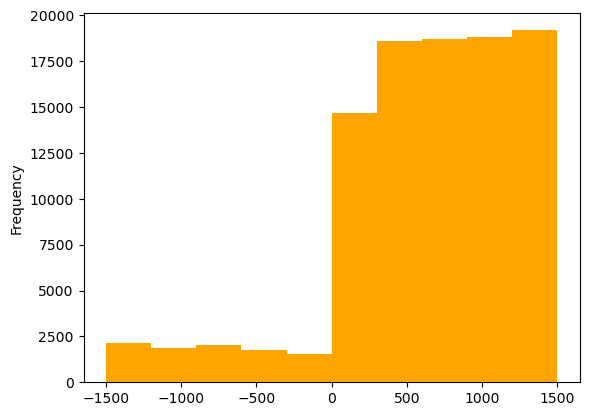

In [71]:
plt.grid()
Customer_dataset['Rate'].plot(kind = 'hist', color= 'orange')

### Categorical variables:-

### 1) Gender

<Axes: ylabel='Gender'>

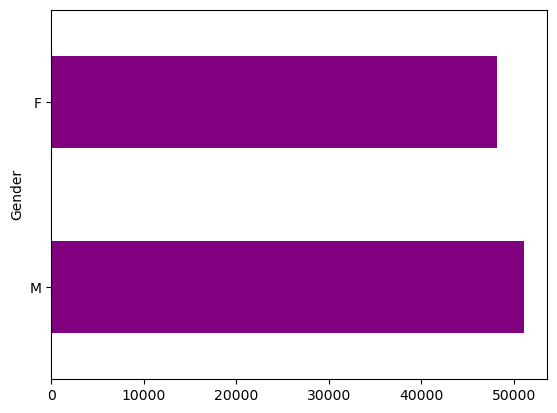

In [72]:
Customer_dataset['Gender'].value_counts().plot(kind = 'barh', color = 'purple')

### 2) Store Type

<Axes: ylabel='Store_type'>

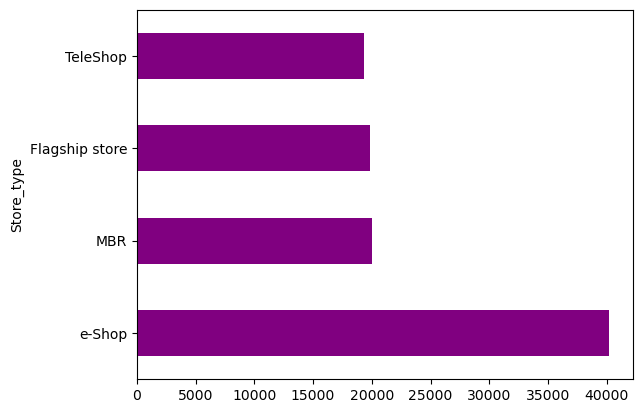

In [73]:
Customer_dataset['Store_type'].value_counts().plot(kind = 'barh', color = 'purple')

### 3) Product Category

<Axes: ylabel='prod_cat'>

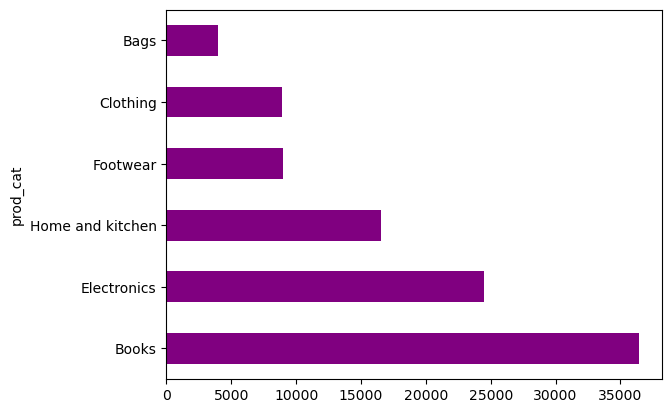

In [74]:
Customer_dataset['prod_cat'].value_counts().plot(kind = 'barh', color = 'purple')

### 4) Product Sub-category

<Axes: ylabel='prod_subcat'>

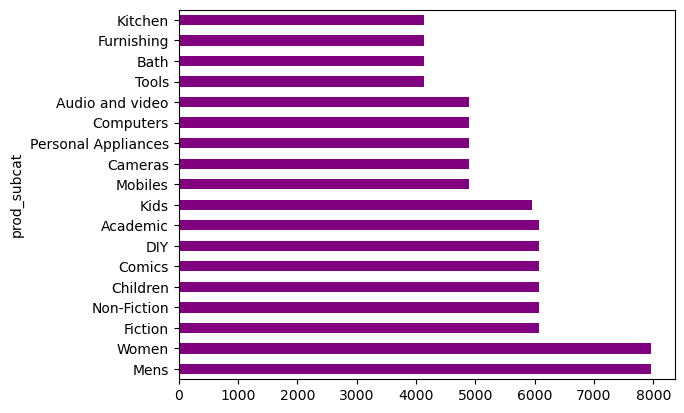

In [75]:
Customer_dataset['prod_subcat'].value_counts().plot(kind = 'barh', color = 'purple')

## 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

In [76]:
Customer_dataset.DOB = pd.to_datetime(Customer_dataset.DOB,format = '%d-%m-%Y')

In [77]:
def convertDateTime(x):
    x=x.replace('/','-')
    x=pd.to_datetime(x,format='%d-%m-%Y')
    return x

In [78]:
Customer_dataset.tran_date = Customer_dataset.tran_date.apply(lambda x:convertDateTime(x))

In [79]:
Max_date = Customer_dataset.tran_date.max()
Max_date

Timestamp('2014-02-28 00:00:00')

In [80]:
Min_date = Customer_dataset.tran_date.min()
Min_date

Timestamp('2011-01-25 00:00:00')

In [81]:
print(Max_date-Min_date)

1130 days 00:00:00


### b. Count of transactions where the total amount of transaction was negative

In [82]:
dataset = Customer_dataset['total_amt']
count_negative = Customer_dataset.loc[(dataset<0),['total_amt']].count()
count_negative

total_amt    9294
dtype: int64

## 5. Analyze which product categories are more popular among females vs male customers.

In [83]:
product_categories_popular = Customer_dataset.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_categories_popular

,Gender,prod_cat,Qty
0,F,Bags,4724
1,F,Books,42420
2,F,Clothing,10275
3,F,Electronics,29160
4,F,Footwear,11148
5,F,Home and kitchen,19580
6,M,Bags,4692
7,M,Books,45522
8,M,Clothing,11244
9,M,Electronics,32380


In [84]:
product_categories_popular.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,4724,42420,10275,29160,11148,19580
M,4692,45522,11244,32380,10665,20164


#### Products that are popular among males are:
    Books
    Electronics
    Home and kitchen
    Clothing
    Footwear
    Bags
    
   
#### Products that are popular among females are:
    Books
    Electronics
    Home and kitchen
    Footwear
    Clothing
    Bags

## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [85]:
max_cust = Customers['city_code'].value_counts()
t = max_cust.nlargest(1)

display("City code which has Maximum customers is : ",t)

'City code which has Maximum customers is : '

city_code
3.0    595
Name: count, dtype: int64

In [86]:
total_customer = Customers['customer_Id'].count()
percentage = round((595/total_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percentage))

Percentage of customers from the city code 3 is 10.54% : 


## 7. Which store type sells the maximum products by value and by quantity?

In [87]:
Product_Value=Customer_dataset.groupby('Store_type')[['Qty','total_amt']].agg({'Qty':'sum','total_amt':'sum'}).reset_index()
Product_Value.sort_values(['Qty','total_amt'],ascending=False)

,Store_type,Qty,total_amt
3,e-Shop,98447,8.591575e+07
1,MBR,48285,4.170033e+07
0,Flagship store,48007,4.188397e+07
2,TeleShop,47339,4.046656e+07


#### Hence, Store Type e-shop sells maximun products by value and by quantity.

## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [88]:
store_group = round(Customer_dataset.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,1741097.67,1697357.35,1578362.11,3232600.15
Books,14929235.10,14976235.17,15270030.36,31760663.61
Clothing,3583269.69,3863059.00,3725503.08,7581580.70
Electronics,11075680.20,10537572.82,9866694.18,22132370.98
Footwear,3704419.68,3336491.14,3707157.87,7911254.13
Home and kitchen,6850270.70,7289614.28,6318809.90,13297278.28


In [89]:
store_group.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing        3583269.69
Electronics    11075680.20
Name: Flagship store, dtype: float64

In [90]:
result = store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()
round_result = round(result,2)
round_result

14658949.89

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [91]:
Male_in_Electronics = Customer_dataset[(Customer_dataset['Gender'] == 'M') & (Customer_dataset['prod_cat'] == 'Electronics')]

Total_amount_earned = Male_in_Electronics['total_amt'].sum()

print(f'The total amount earned from Male customers under the Electronics category is: Rs {Total_amount_earned}')

The total amount earned from Male customers under the Electronics category is: Rs 28515547.125


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [92]:
df = pd.DataFrame(Customer_dataset)
df1 = df[(df.total_amt > 0)]
ts = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)

Total customers having more than 10 unique transactions are -  20876


## 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [93]:
Customer_dataset['Age'] = (datetime.datetime.today().year - Customer_dataset['DOB'].dt.year)
final_Customer_dataset = Customer_dataset[(Customer_dataset['Age'] >= 25) & (Customer_dataset['Age'] <= 35) & (Customer_dataset['prod_cat'].isin(['Electronics', 'Books']))]
total_amount_spent = final_Customer_dataset['total_amt'].sum()
print("Total amount spent on Electronics and Books by customers aged between 25 and 35:", total_amount_spent)

Total amount spent on Electronics and Books by customers aged between 25 and 35: 21751521.675


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [94]:
Customer_dataset['tran_date'] = pd.to_datetime(Customer_dataset['tran_date'])

t_date = Customer_dataset[(Customer_dataset['tran_date'] > '2014-01-01') & (Customer_dataset['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)

Total amount spent by the customer -  9343573.915
